In [1]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import statsmodels.api as sm
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)
#import imblearn
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from statsmodels.discrete.discrete_model import Logit
import torch
import torch.nn as nn
import torch.nn.functional as F
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from keras.models import Sequential
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestClassifier
# Confusion Matrix
from sklearn.metrics import confusion_matrix
# Accuracy
from sklearn.metrics import accuracy_score
# Recall
from sklearn.metrics import recall_score
# Precision
from sklearn.metrics import precision_score
# F1
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import math 
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where


2023-01-03 07:42:48.131078: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA

To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
is_cuda = torch.cuda.is_available()

if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU not available, CPU used


## Data Preprocessing 

In [3]:
# Importing dataset 

base_csv = 'IslamicMIF.csv'
df = pd.read_csv(base_csv)

In [4]:
# Delete unnecessary columns 

df = df.iloc[:, :-13] #only to run once otherwise it deletes columns every time

In [5]:
# Drop and modify variables 

df = df.loc[:,~df.columns.str.startswith('From which financial service providers')]
df = df.loc[:,~df.columns.str.startswith('If others,')]
df = df.loc[:,~df.columns.str.startswith('Where do you save')]
df = df.loc[:,~df.columns.str.startswith('What are ')]
df = df.loc[:,~df.columns.str.startswith('Why have you not been able')]
df = df.loc[:,~df.columns.str.startswith('What do you like')]
df = df.loc[:,~df.columns.str.startswith('What dont you like')]
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('/','_')
df.columns = df.columns.str.replace(',','_')
df.columns = df.columns.str.replace('?','_')
df.columns = df.columns.str.replace('(','_')
df.columns = df.columns.str.replace(')','_')
df.columns = df.columns.str.replace('-','_')
df

,Gender_of_the_respondent,Age_of_the_respondent,Marital_status,Highest_education_level,County,Religion,Which_are_your_main_sources_of_livelihood___multiple_response_,Which_are_your_main_sources_of_livelihood___multiple_response__Animal_rearing,Which_are_your_main_sources_of_livelihood___multiple_response__Dependent_e.g._student,Which_are_your_main_sources_of_livelihood___multiple_response__Own_business,...,How_did_you_know_about_these_financial_service_providers___Multiple_response__Social_media,How_did_you_know_about_these_financial_service_providers___Multiple_response__Family_members,How_did_you_know_about_these_financial_service_providers___Multiple_response__Others,How_did_you_know_about_these_financial_service_providers___Multiple_response__Friends,How_often_do_you_use_financial_services_from_these_providers_,Have_you_been_able_to_make_saving_contributions_through_any_financial_service_provider_,How_often_do_you_save_,On_average__how_much_are_you_able_to_save_monthly_,Have_you_been_able_to_take_up_a_loan_through_any_financial_service_provider_,Do_you_belong_to_any_informal_group_chama__table_banking__merry_go_round__
0,Female,35,Married,None,garissa,Muslim,Dependent e.g. student,0,1,0,...,0.0,0.0,0.0,1.0,Monthly,No,NaN,NaN,No,No
1,Male,27,Single,Primary,Nakuru,Muslim,Casual work,0,0,0,...,0.0,1.0,0.0,0.0,Weekly,No,NaN,NaN,No,No
2,Male,65,Married,Primary,Nakuru,Muslim,Casual work,0,0,0,...,0.0,0.0,0.0,1.0,Weekly,No,NaN,NaN,No,No
3,Male,40,Married,Secondary,Nakuru,Muslim,Employment,0,0,0,...,1.0,0.0,0.0,0.0,Daily,Yes,Weekly,25000.0,No,No
4,Female,26,Married,University,Nakuru,Muslim,Employment,0,0,0,...,0.0,0.0,0.0,0.0,Daily,Yes,Daily,5000.0,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Female,30,Married,None,garissa,Muslim,Employment,0,0,0,...,0.0,0.0,0.0,1.0,Monthly,No,NaN,NaN,No,No
502,Male,31,Single,Secondary,garisa,Muslim,Employment,0,0,0,...,0.0,0.0,0.0,1.0,Monthly,No,NaN,NaN,No,No
503,Male,40,Married,None,garissa,Muslim,Employment,0,0,0,...,0.0,0.0,0.0,1.0,Monthly,No,NaN,NaN,No,No
504,Female,28,Married,None,garissa,Muslim,Employment,0,0,0,...,0.0,0.0,0.0,1.0,Monthly,No,NaN,NaN,No,No


In [6]:
# Mean Imputation

df = df.copy()
mean_imputer = SimpleImputer(strategy='mean')
df['On_average__how_much_are_you_able_to_save_monthly_'] = mean_imputer.fit_transform(df['On_average__how_much_are_you_able_to_save_monthly_'].values.reshape(-1,1))


In [7]:
df.to_csv('df.csv', index=False)

In [8]:
# Create dummies for logistic regression 

df_final = pd.get_dummies(data=df, columns=[ 'Marital_status', 'Highest_education_level', 'Gender_of_the_respondent', 'County', 'What_is_your_average_monthly_income_', 'How_often_do_you_use_financial_services_from_these_providers_', 'Have_you_been_able_to_make_saving_contributions_through_any_financial_service_provider_', 'How_often_do_you_save_', 'Do_you_belong_to_any_informal_group_chama__table_banking__merry_go_round__', 'Have_you_been_able_to_take_up_a_loan_through_any_financial_service_provider_', 'Religion'])
df_final.head()

,Age_of_the_respondent,Which_are_your_main_sources_of_livelihood___multiple_response_,Which_are_your_main_sources_of_livelihood___multiple_response__Animal_rearing,Which_are_your_main_sources_of_livelihood___multiple_response__Dependent_e.g._student,Which_are_your_main_sources_of_livelihood___multiple_response__Own_business,Which_are_your_main_sources_of_livelihood___multiple_response__Casual_work,Which_are_your_main_sources_of_livelihood___multiple_response__Pension,Which_are_your_main_sources_of_livelihood___multiple_response__Others,Which_are_your_main_sources_of_livelihood___multiple_response__Employment,Which_are_your_main_sources_of_livelihood___multiple_response__Crop_farming,...,How_often_do_you_save__Quarterly,How_often_do_you_save__Weekly,Do_you_belong_to_any_informal_group_chama__table_banking__merry_go_round___No,Do_you_belong_to_any_informal_group_chama__table_banking__merry_go_round___Yes,Have_you_been_able_to_take_up_a_loan_through_any_financial_service_provider__No,Have_you_been_able_to_take_up_a_loan_through_any_financial_service_provider__Yes,Religion_Christian,Religion_Hindu,Religion_Muslim,Religion_Pagan
0,35,Dependent e.g. student,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,27,Casual work,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,65,Casual work,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,40,Employment,0,0,0,0,0,0,1,0,...,0,1,1,0,1,0,0,0,1,0
4,26,Employment,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [9]:
# Drop columns in the dataset that are hot one encoded already 

del df_final['Which_are_your_main_sources_of_livelihood___multiple_response_']
del df_final['Which_financial_service_providers_are_you_aware_of___multiple_response_']
del df_final['Which_financial_service_providers_do_you_usually_use___multiple_response_']
del df_final['How_did_you_know_about_these_financial_service_providers___Multiple_response_']

In [10]:
# Check nas 

df_final.isna().sum()

Age_of_the_respondent                                                                    0
Which_are_your_main_sources_of_livelihood___multiple_response__Animal_rearing            0
Which_are_your_main_sources_of_livelihood___multiple_response__Dependent_e.g._student    0
Which_are_your_main_sources_of_livelihood___multiple_response__Own_business              0
Which_are_your_main_sources_of_livelihood___multiple_response__Casual_work               0
                                                                                        ..
Have_you_been_able_to_take_up_a_loan_through_any_financial_service_provider__Yes         0
Religion_Christian                                                                       0
Religion_Hindu                                                                           0
Religion_Muslim                                                                          0
Religion_Pagan                                                                           0

In [11]:
# drop nas 

df_final = df_final.dropna(axis=1)
df_final = df_final.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
print(df_final.shape)

(506, 88)


In [12]:
#copy df_final for NN
df_for_NN = df_final.copy()

## Data Exploration 

In [13]:
# X and y 

X = df_final.drop(columns='Do_you_belong_to_any_informal_group_chama__table_banking__merry_go_round___Yes')
y = df_final['Do_you_belong_to_any_informal_group_chama__table_banking__merry_go_round___Yes']

# Scaling 

scaler = StandardScaler()
scaled = scaler.fit_transform(X)
df_final = pd.DataFrame(scaled, columns = list(X))

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 7)

# Oversample the training data using SMOTE
smote = SMOTE(random_state= 4)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

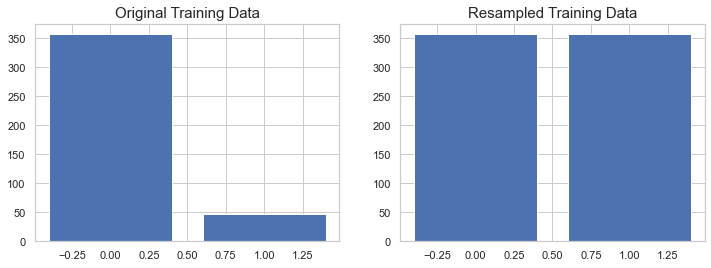

In [14]:
# Count the number of samples of each class in the original training data
original_counts = Counter(y_train.values.ravel())

# Count the number of samples of each class in the resampled training data
resampled_counts = Counter(y_train_resampled.values.ravel())

# Plot the original and resampled counts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.bar(original_counts.keys(), original_counts.values())
ax1.set_title('Original Training Data', fontsize = 15 )

ax2.bar(resampled_counts.keys(), resampled_counts.values())
ax2.set_title('Resampled Training Data', fontsize = 15)

plt.show()


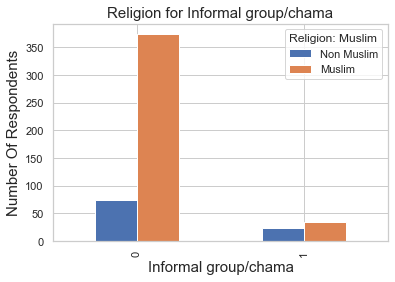

In [15]:
# create a cross-tabulation of the data
ct = pd.crosstab(y, df_final.Religion_Muslim)

# plot the cross-tabulation as a bar plot
ct.plot(kind='bar')

# set the title, x-label, and y-label
plt.title('Religion for Informal group/chama', fontsize=15)
plt.xlabel('Informal group/chama', fontsize=15)
plt.ylabel('Number Of Respondents', fontsize=15)

# create a legend
plt.legend(['Non Muslim', 'Muslim'], title='Religion: Muslim')

# show the plot
plt.show()


Text(0, 0.5, 'Number of Respondents')

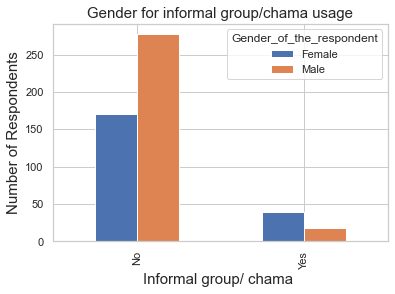

In [16]:
pd.crosstab(df.Do_you_belong_to_any_informal_group_chama__table_banking__merry_go_round__,df.Gender_of_the_respondent).plot(kind='bar')
plt.title('Gender for informal group/chama usage', fontsize = 15)
plt.xlabel('Informal group/ chama ', fontsize = 15)
plt.ylabel('Number of Respondents', fontsize = 15)

#make plots look pretty, increase font size 

## First model : Logistic regression with Hyperparameter tuning

In [17]:
# tuning and gridsearch 
parameters = {  
'penalty' : ['l1', 'l2'],  
'C' : np.logspace(-3,3,7),  
'solver' : ['newton-cg', 'lbfgs', 'liblinear'],  
}

logreg = LogisticRegression()  
grid = GridSearchCV(logreg, 
param_grid = parameters, 
scoring='accuracy', 
cv=10)
grid.fit(X_train_resampled, y_train_resampled)

print("Tuned Hyperparameters :", grid.best_params_)  
print("Accuracy :", grid.best_score_)

Tuned Hyperparameters : {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

Accuracy : 1.0


In [18]:
# fit the model using the best hyperparameters
logreg = LogisticRegression(C = 0.1, 
                            penalty = 'l2', 
                            solver = 'liblinear')
logreg.fit(X_train_resampled, y_train_resampled)

# make predictions on the train and test sets
y_pred_train = logreg.predict(X_train_resampled)
y_pred_test = logreg.predict(X_test)

# calculate train and test accuracies
train_accuracy = logreg.score(X_train_resampled, y_train_resampled)
test_accuracy = logreg.score(X_test, y_test)

# print the train and test accuracies
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

# calculate precision, recall, and f1 score for test set
accuracy =accuracy_score(y_test,y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
w = logreg.coef_[0]
print(w)

# print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Train accuracy: 0.9957983193277311

Test accuracy: 1.0

[ 4.77156544e-02 -3.11468220e-01 -1.80639898e-01 -1.99620798e-01

 -2.36628322e-01 -6.68710155e-02  1.26170110e-01 -2.79713460e-01

 -8.61824416e-02  1.23850798e-05 -1.66768448e-01 -7.65165675e-02

 -1.48937978e-01 -1.03398634e-01 -2.16747386e-02 -2.64786681e-01

 -2.30904270e-01 -3.92086710e-01 -1.38517246e-01 -1.49813089e-01

 -2.03585144e-01 -2.41847919e-02  2.80114758e-01 -6.64537739e-01

 -4.80377293e-02 -2.36387028e-02 -3.75745568e-02 -3.65956383e-02

 -7.02446945e-02  2.41967654e-01  9.76173401e-03 -1.99784783e-02

  9.26653311e-02 -3.28713552e-02 -6.23137899e-03 -6.31633728e-03

 -5.00458362e-02 -5.45074348e-02 -1.78534053e-02 -1.81165027e-01

 -1.24903373e-02 -8.82965318e-03  7.41923979e-02 -4.28204468e-02

 -1.15395825e-02 -4.52195038e-01 -2.57252152e-01 -3.48843377e-03

 -4.99394046e-03 -5.86823107e-02 -7.52121667e-03 -5.00830988e-02

  8.22984814e-03 -1.50728648e-01 -2.29588271e-01 -7.99297982e-02

 -2.05338829e-01 -2.

In [19]:
features = list(X)
features_importance = pd.DataFrame(features, columns = ["Features"])
features_importance["Importance"]=pow(math.e, np.array(w))
print(features_importance.sort_values(by = ["Importance"], ascending = False).to_string())

#in this model, majority of the features are equally important in the prediction so this does not give an idea of what predictors are most relevant. 
#for this reason, I will perform another logistic regression based on p-values 

                                                                                       Features  Importance

73  Have_you_been_able_to_make_saving_contributions_through_any_financial_service_provider__Yes    1.575915

22                                                              Gender_of_the_respondent_Female    1.323282

29                                                                                County_KILIFI    1.273753

6                         Which_are_your_main_sources_of_livelihood___multiple_response__Others    1.134475

75                                                                 How_often_do_you_save__Daily    1.123531

72   Have_you_been_able_to_make_saving_contributions_through_any_financial_service_provider__No    1.112440

32                                                                                County_Kilifi    1.097095

42                                                               County_Nairobi Eastleigh South    1.077014

82             Have

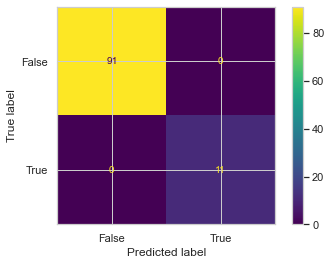

1.0

[1. 1.]

[1. 1.]

              precision    recall  f1-score   support



           0       1.00      1.00      1.00        91

           1       1.00      1.00      1.00        11



    accuracy                           1.00       102

   macro avg       1.00      1.00      1.00       102

weighted avg       1.00      1.00      1.00       102



102

102


In [20]:
# Evaluate the model 
 
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
print(accuracy_score(y_test, y_pred_test))
print(recall_score(y_test, y_pred_test, average=None))
print(precision_score(y_test, y_pred_test, average=None))
print(classification_report(y_test, y_pred_test))
print(len(y_test))
print(len(y_pred_test))

### Logistic regression based on P-values 

In [21]:
rfe = RFE(logreg, step = 80)
rfe = rfe.fit(X_train_resampled, y_train_resampled.values.ravel())
dff = pd.DataFrame([np.array(list(X)),rfe.support_]).transpose()
display(dff[dff[1]==True].style.set_properties(subset=[0], **{'text-align': 'right'}))
display(dff[dff[1]==False].style.set_properties(subset=[0], **{'text-align': 'right'}))

,0,1
1,Which_are_your_main_sources_of_livelihood___multiple_response__Animal_rearing,True
2,Which_are_your_main_sources_of_livelihood___multiple_response__Dependent_e.g._student,True
3,Which_are_your_main_sources_of_livelihood___multiple_response__Own_business,True
4,Which_are_your_main_sources_of_livelihood___multiple_response__Casual_work,True
6,Which_are_your_main_sources_of_livelihood___multiple_response__Others,True
7,Which_are_your_main_sources_of_livelihood___multiple_response__Employment,True
10,Marital_status_Divorced,True
12,Marital_status_Single,True
13,Marital_status_Widow(er),True
15,Highest_education_level_College,True


,0,1
0,Age_of_the_respondent,False
5,Which_are_your_main_sources_of_livelihood___multiple_response__Pension,False
8,Which_are_your_main_sources_of_livelihood___multiple_response__Crop_farming,False
9,On_average__how_much_are_you_able_to_save_monthly_,False
11,Marital_status_Married,False
14,Highest_education_level_Adult education,False
21,Highest_education_level_Youth polyechnique,False
24,County_Eastleigh North,False
25,County_Eastleigh north,False
26,County_Embakasi,False


In [22]:
cols1 = list(dff[dff[1]==True][0])
cols1.remove("Do_you_belong_to_any_informal_group_chama__table_banking__merry_go_round___No")

In [25]:
X=X_train_resampled[cols1]
y=y_train_resampled

#implementing model 
X = sm.add_constant(X)
logit_model= sm.OLS(y,X)
result = logit_model.fit()
y_pred1 = logreg.predict(X_test)

print(result.summary())
cols2 = []
for i, val in enumerate(result.pvalues):
    if val < 0.05:
        print(f"{result.pvalues.index[i]}: {val}")
        cols2.append(f"{result.pvalues.index[i]}")


                                                          OLS Regression Results                                                          


Dep. Variable:     Do_you_belong_to_any_informal_group_chama__table_banking__merry_go_round___Yes   R-squared:                       0.768

Model:                                                                                        OLS   Adj. R-squared:                  0.754

Method:                                                                             Least Squares   F-statistic:                     52.94

Date:                                                                            Tue, 03 Jan 2023   Prob (F-statistic):          1.32e-183

Time:                                                                                    07:44:46   Log-Likelihood:                 3.6415

No. Observations:                                                                             714   AIC:                             78.72

Df Residuals:      

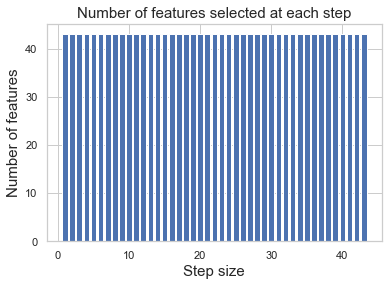

In [25]:
# create an empty list to store the number of features selected at each step
num_features = []

# loop through a range of steps from 1 to the total number of features
for step in range(1, len(X.columns)+1):
    # create an RFE object with the given step size
    rfe = RFE(logreg, step=step)
    
    # fit the RFE object to the training data
    rfe = rfe.fit(X_train_resampled, y_train_resampled.values.ravel())
    
    # append the number of features selected at this step to the list
    num_features.append(sum(rfe.support_))

# plot the number of features selected at each step
plt.bar(range(1, len(X.columns)+1), num_features)

# set the title, x-label, and y-label
plt.title('Number of features selected at each step', fontsize=15)
plt.xlabel('Step size', fontsize=15)
plt.ylabel('Number of features', fontsize=15)

# show the plot
plt.show()


In [26]:
cols = cols2.pop(0)
print(cols2)

['Which_are_your_main_sources_of_livelihood___multiple_response__Dependent_e.g._student', 'Which_are_your_main_sources_of_livelihood___multiple_response__Own_business', 'Which_are_your_main_sources_of_livelihood___multiple_response__Casual_work', 'Which_are_your_main_sources_of_livelihood___multiple_response__Employment', 'Marital_status_Divorced', 'Marital_status_Single', 'Highest_education_level_College', 'Highest_education_level_Madrassa', 'Highest_education_level_None', 'Highest_education_level_Primary', 'Highest_education_level_Secondary', 'Highest_education_level_University', 'Gender_of_the_respondent_Female', 'Gender_of_the_respondent_Male', 'County_KILIFI', 'County_Nakuru', 'County_Wajir', 'County_wajir', 'What_is_your_average_monthly_income__1,000-3,000', 'What_is_your_average_monthly_income__12,001-15,000', 'What_is_your_average_monthly_income__15,001-20,000', 'What_is_your_average_monthly_income__150,001-300,000', 'What_is_your_average_monthly_income__20,001-30,000', 'What_i

In [27]:
X=X_train_resampled[cols2]
y=y_train_resampled
#implementing model 

X = sm.add_constant(X)
logit_model= sm.OLS(y,X)
result = logit_model.fit()

X_test_2 = sm.add_constant(X_test[cols2])
y_pred2 = result.predict(X_test_2)

#Make y_pred binary for the confusion matrix 
binary_y_pred2 = y_pred2.apply(lambda x: 1 if x >= 0 else 0)

print(result.summary())
cols3 = []
for i, val in enumerate(result.pvalues):
    if val < 0.05:
        print(f"{result.pvalues.index[i]}: {val}")
        cols3.append(f"{result.pvalues.index[i]}")


                                                          OLS Regression Results                                                          


Dep. Variable:     Do_you_belong_to_any_informal_group_chama__table_banking__merry_go_round___Yes   R-squared:                       0.764

Model:                                                                                        OLS   Adj. R-squared:                  0.752

Method:                                                                             Least Squares   F-statistic:                     64.63

Date:                                                                            Tue, 03 Jan 2023   Prob (F-statistic):          4.21e-188

Time:                                                                                    07:31:30   Log-Likelihood:                -2.8348

No. Observations:                                                                             714   AIC:                             75.67

Df Residuals:      

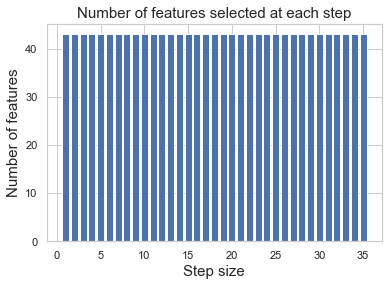

In [28]:
# create an empty list to store the number of features selected at each step
num_features = []

# loop through a range of steps from 1 to the total number of features
for step in range(1, len(X.columns)+1):
    # create an RFE object with the given step size
    rfe = RFE(logreg, step=step)
    
    # fit the RFE object to the training data
    rfe = rfe.fit(X_train_resampled, y_train_resampled.values.ravel())
    
    # append the number of features selected at this step to the list
    num_features.append(sum(rfe.support_))

# plot the number of features selected at each step
plt.bar(range(1, len(X.columns)+1), num_features)

# set the title, x-label, and y-label
plt.title('Number of features selected at each step', fontsize=15)
plt.xlabel('Step size', fontsize=15)
plt.ylabel('Number of features', fontsize=15)

# show the plot
plt.show()


In [29]:
print(cols3)

['const', 'Which_are_your_main_sources_of_livelihood___multiple_response__Dependent_e.g._student', 'Which_are_your_main_sources_of_livelihood___multiple_response__Own_business', 'Which_are_your_main_sources_of_livelihood___multiple_response__Casual_work', 'Which_are_your_main_sources_of_livelihood___multiple_response__Employment', 'Marital_status_Divorced', 'Marital_status_Single', 'Highest_education_level_College', 'Highest_education_level_Madrassa', 'Highest_education_level_None', 'Highest_education_level_Primary', 'Highest_education_level_Secondary', 'Highest_education_level_University', 'Gender_of_the_respondent_Female', 'Gender_of_the_respondent_Male', 'County_KILIFI', 'County_Nakuru', 'County_Wajir', 'County_wajir', 'What_is_your_average_monthly_income__1,000-3,000', 'What_is_your_average_monthly_income__12,001-15,000', 'What_is_your_average_monthly_income__15,001-20,000', 'What_is_your_average_monthly_income__150,001-300,000', 'What_is_your_average_monthly_income__20,001-30,000'

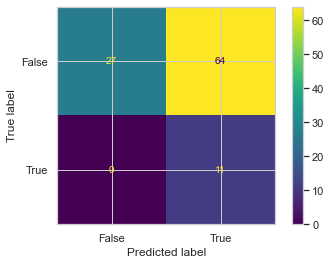

0.37254901960784315

[0.2967033 1.       ]

[1.         0.14666667]

              precision    recall  f1-score   support



           0       1.00      0.30      0.46        91

           1       0.15      1.00      0.26        11



    accuracy                           0.37       102

   macro avg       0.57      0.65      0.36       102

weighted avg       0.91      0.37      0.44       102




In [32]:
# Evaluate the model
confusion_matrix = metrics.confusion_matrix(y_test, binary_y_pred2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
print(accuracy_score(y_test,binary_y_pred2))
print(recall_score(y_test, binary_y_pred2, average=None))
print(precision_score(y_test,binary_y_pred2, average=None))
print(classification_report(y_test, binary_y_pred2))

## Neural Network 
### Variables with significant p-value 

In [28]:
#print(df_final)
selected_vars = df_for_NN[['Which_are_your_main_sources_of_livelihood___multiple_response__Dependent_e.g._student', 'Which_are_your_main_sources_of_livelihood___multiple_response__Own_business', 'Which_are_your_main_sources_of_livelihood___multiple_response__Casual_work', 'Which_are_your_main_sources_of_livelihood___multiple_response__Employment', 'Marital_status_Divorced', 'Marital_status_Single', 'Highest_education_level_College', 'Highest_education_level_Madrassa', 'Highest_education_level_None', 'Highest_education_level_Primary', 'Highest_education_level_Secondary', 
                           'Highest_education_level_University', 'Gender_of_the_respondent_Female', 'Gender_of_the_respondent_Male', 'County_KILIFI', 'County_Nakuru', 'County_Wajir', 'County_wajir', 'What_is_your_average_monthly_income__1,000-3,000', 'What_is_your_average_monthly_income__12,001-15,000', 'What_is_your_average_monthly_income__15,001-20,000', 'What_is_your_average_monthly_income__150,001-300,000', 'What_is_your_average_monthly_income__20,001-30,000', 'What_is_your_average_monthly_income__30,001-40,000', 'What_is_your_average_monthly_income__9,001-12,000',
                           'How_often_do_you_use_financial_services_from_these_providers__Daily',
                           'How_often_do_you_use_financial_services_from_these_providers__Not often', 'How_often_do_you_use_financial_services_from_these_providers__Weekly', 'How_often_do_you_save__Daily', 'How_often_do_you_save__Every two weeks', 
                           'How_often_do_you_save__Monthly', 'Have_you_been_able_to_take_up_a_loan_through_any_financial_service_provider__No', 'Do_you_belong_to_any_informal_group_chama__table_banking__merry_go_round___Yes']]

selected_vars.head()


,Which_are_your_main_sources_of_livelihood___multiple_response__Dependent_e.g._student,Which_are_your_main_sources_of_livelihood___multiple_response__Own_business,Which_are_your_main_sources_of_livelihood___multiple_response__Casual_work,Which_are_your_main_sources_of_livelihood___multiple_response__Employment,Marital_status_Divorced,Marital_status_Single,Highest_education_level_College,Highest_education_level_Madrassa,Highest_education_level_None,Highest_education_level_Primary,...,"What_is_your_average_monthly_income__30,001-40,000","What_is_your_average_monthly_income__9,001-12,000",How_often_do_you_use_financial_services_from_these_providers__Daily,How_often_do_you_use_financial_services_from_these_providers__Not often,How_often_do_you_use_financial_services_from_these_providers__Weekly,How_often_do_you_save__Daily,How_often_do_you_save__Every two weeks,How_often_do_you_save__Monthly,Have_you_been_able_to_take_up_a_loan_through_any_financial_service_provider__No,Do_you_belong_to_any_informal_group_chama__table_banking__merry_go_round___Yes
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


# X and y 
X = selected_vars.drop(columns = 'Do_you_belong_to_any_informal_group_chama__table_banking__merry_go_round___Yes')
y = selected_vars['Do_you_belong_to_any_informal_group_chama__table_banking__merry_go_round___Yes']

# Scaling 
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
df_final = pd.DataFrame(scaled, columns = list(X))

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 7)

# Oversample the training data using SMOTE
smote = SMOTE(random_state= 4)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

#Model 
model = Sequential()
model.add(layers.Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with a validation set
history = model.fit(X_train_res, y_train_res, epochs= 50, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

In [30]:
print(len(X_train_res))

714


In [31]:
model.evaluate(X_test, y_test)[1]

4/4 [==============================] - 0s 1ms/step - loss: 0.3476 - accuracy: 0.8431


0.843137264251709

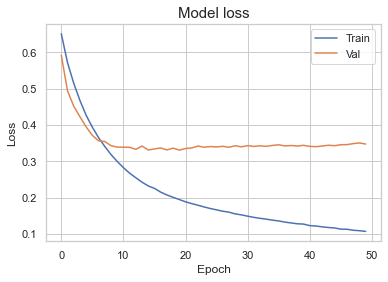

In [32]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize = 15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


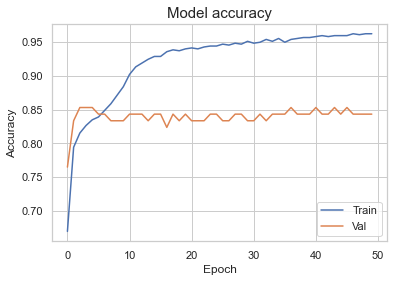

In [33]:
#training accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy', fontsize = 15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [47]:
# make predictions on the train and test sets
#y_pred_train = model.predict(X_train_res)
y_pred3 = model.predict(X_test)

print(np.mean(y_pred_test3))

#Make y_pred binary for the confusion matrix. Cutoff point is mean value 
binary_y_pred3 = np.array([1 if x >= 0.11637336 else 0 for x in y_pred3])

4/4 [==============================] - 0s 1ms/step

0.11637336


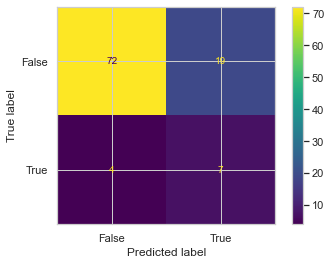

0.7745098039215687

[0.79120879 0.63636364]

[0.94736842 0.26923077]

              precision    recall  f1-score   support



           0       0.95      0.79      0.86        91

           1       0.27      0.64      0.38        11



    accuracy                           0.77       102

   macro avg       0.61      0.71      0.62       102

weighted avg       0.87      0.77      0.81       102




In [49]:
# Evaluate the model 
confusion_matrix = metrics.confusion_matrix(y_test, binary_y_pred3)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
print(accuracy_score(y_test,binary_y_pred3))
print(recall_score(y_test, binary_y_pred3, average=None))
print(precision_score(y_test,binary_y_pred3, average=None))
print(classification_report(y_test, binary_y_pred3))